## Yelp reviews analysis

STAT 628 Group 13:\
Yike Wang\
Yuhan Zhou\
Jonquil Liao

### 1. Import the data

In [ ]:
import pandas as pd
review = pd.read_json('/Users/zhonglingliao/Desktop/stat628/module3/Data/review_city.json', lines=True)
business = pd.read_json('/Users/zhonglingliao/Desktop/stat628/module3/Data/business_city.json', lines=True)

In [64]:
df_raw = pd.merge(review, business, how='left', on='business_id')
df = df_raw.drop(columns=[ 'review_id', 'user_id', 'funny', 'cool', 'date', 'latitude', 'longitude', 'is_open', 'review_count', 'hours'])

In [40]:
df.head()

,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
0,HQl28KMwrEKHqhFrrDqVNQ,5,1,I love Deagan's. I do. I really do. The atmosp...,Deagan's Kitchen & Bar,14810 Detroit Ave,Lakewood,OH,44107,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (..."
1,ZlCSsWS07JulSBIQlrbF5w,5,1,Called for a 5:15 morning reservation. The dri...,Black Cab & Limo,,Champaign,IL,,4.5,{'WiFi': 'u'free''},"Airport Shuttles, Transportation, Taxis, Hotel..."
2,oVuZtlCFg_zF090Nhtp0Ow,4,3,A close friend was in town and so instead of t...,Choolaah Indian BBQ,6114 Centre Ave,Pittsburgh,PA,15206,4.0,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Indian, Vegetarian, Vegan, Gluten..."
3,wSAGILK2CFbq5BVZ5D67-A,3,0,The service is attentive. The decor attractive...,Adega,2017 E 9th St,Cleveland,OH,44115,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Mediterranean, Hotels, Beer, Wine & Spirits, B..."
4,oCvxJBOs-Mbg-4oanPO7lQ,4,0,The ingredients are always fresh and I like th...,Pita Pit,2763 East Carson St,Pittsburgh,PA,15203,3.5,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","Fast Food, Greek, Breakfast & Brunch, Restaura..."


### 2. Choose the Business

#### We plan to focus on business type 'Steakhouse', so here we pick out the businesses only in category 'Steakhouse'.

In [41]:
data = df[df['categories'].str.contains('Steakhouse',na=False)]

In [42]:
data.head()

,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
169,VGxJbglGlx-a7Gdc55Q6jQ,1,1,I gave this place 2 chances. i love japanese f...,Katana,3229 W Liberty Ave,Pittsburgh,PA,15216,3.0,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Restaurants, Japanese, Sushi Bars, Chinese, St..."
188,lpxj6LFir23Ds6swW8a6fg,4,0,Very fresh food and authentic Italian taste. T...,Grandview Saloon,1212 Grandview Ave,Pittsburgh,PA,15211,3.0,"{'Alcohol': 'u'full_bar'', 'WiFi': ''free'', '...","Restaurants, Steakhouses, Seafood, American (T..."
219,d6VYQbeTZ_WdD8Uuhh35dg,5,0,This is my favorite happy hour place in all of...,Tempest Oyster Bar,120 E Wilson St,Madison,WI,53703,4.0,"{'RestaurantsTakeOut': 'False', 'WiFi': 'u'no'...","Steakhouses, Restaurants, Bars, Seafood, Night..."
262,szGbmw_vq3kVU4SfK1x6Sw,4,1,Ruth Chris Steakhouse is by far one of the bes...,Ruths Chris Steak House,6 PPG Pl,Pittsburgh,PA,15222,4.0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Steakhouses"
269,ZspvlO5Dvtd517YhVLJJ_A,3,5,"When it comes to Tomo, my biggest suggestions ...",Tomo Sushi & Hibachi,1293 W 9th St,Cleveland,OH,44113,3.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Sushi Bars, Restaurants, Japanese, Steakhouses"


In [43]:
len(data)

32184

In [68]:
liststeak = {}.fromkeys(data.business_id).keys()
len(liststeak)

354

#### There are around 354 businesses that contains category 'Steakhouse' and 30000 reviews we should work on.

#### Let's take a look at how many reviews  in each rating level.

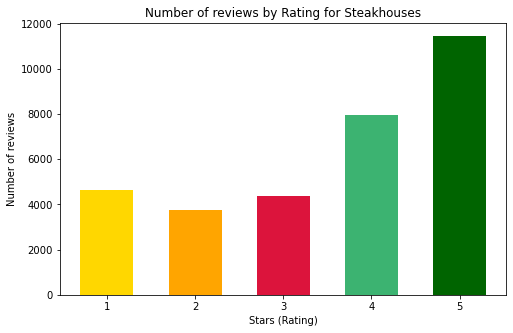

In [69]:
import matplotlib.pyplot as plt
star_x = data.stars_x.value_counts().index
star_y = data.stars_x.value_counts().values
plt.figure(figsize=(8,5))
bar_colors = ['darkgreen', 'mediumseagreen', 'gold', 'crimson', 'orange']
plt.bar(star_x, star_y, color=bar_colors, width=.6)
plt.xlabel('Stars (Rating)')
plt.ylabel('Number of reviews')
plt.title('Number of reviews by Rating for Steakhouses');

#### Let's take a look at how many reviews are there for each rating level.

In [58]:
review_steakhouse = review[review.business_id.isin(data.business_id)]

In [59]:
review_steakhouse.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
169,6GNIVJCqvvPAKXKL3oa9Sg,w1nr-eZ04z-Cq4ErAN2otg,VGxJbglGlx-a7Gdc55Q6jQ,1,1,1,0,I gave this place 2 chances. i love japanese f...,2013-05-08 01:34:24
188,wqwgRouFIAi29XGhSiZoDg,m5ID0Dpz6IxbNPmhgZQyEQ,lpxj6LFir23Ds6swW8a6fg,4,0,0,0,Very fresh food and authentic Italian taste. T...,2014-08-10 20:30:28
219,7vsixeZiFsfGoI7JxTpqLg,URig1W1Y_6P2viLKDx5hkQ,d6VYQbeTZ_WdD8Uuhh35dg,5,0,0,1,This is my favorite happy hour place in all of...,2016-11-09 21:15:28
262,0wceCr75fE63DVC-BxJucQ,jV2JRJT9oSEVzoSkOSqmiQ,szGbmw_vq3kVU4SfK1x6Sw,4,1,0,0,Ruth Chris Steakhouse is by far one of the bes...,2015-01-03 23:44:23
269,R2agv2EUeCooIv0_-3X7YA,u3ZPMVVEzneq8x856WksJQ,ZspvlO5Dvtd517YhVLJJ_A,3,5,0,2,"When it comes to Tomo, my biggest suggestions ...",2016-03-06 23:43:57


In [70]:
data.head()

,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
169,VGxJbglGlx-a7Gdc55Q6jQ,1,1,I gave this place 2 chances. i love japanese f...,Katana,3229 W Liberty Ave,Pittsburgh,PA,15216,3.0,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Restaurants, Japanese, Sushi Bars, Chinese, St..."
188,lpxj6LFir23Ds6swW8a6fg,4,0,Very fresh food and authentic Italian taste. T...,Grandview Saloon,1212 Grandview Ave,Pittsburgh,PA,15211,3.0,"{'Alcohol': 'u'full_bar'', 'WiFi': ''free'', '...","Restaurants, Steakhouses, Seafood, American (T..."
219,d6VYQbeTZ_WdD8Uuhh35dg,5,0,This is my favorite happy hour place in all of...,Tempest Oyster Bar,120 E Wilson St,Madison,WI,53703,4.0,"{'RestaurantsTakeOut': 'False', 'WiFi': 'u'no'...","Steakhouses, Restaurants, Bars, Seafood, Night..."
262,szGbmw_vq3kVU4SfK1x6Sw,4,1,Ruth Chris Steakhouse is by far one of the bes...,Ruths Chris Steak House,6 PPG Pl,Pittsburgh,PA,15222,4.0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Steakhouses"
269,ZspvlO5Dvtd517YhVLJJ_A,3,5,"When it comes to Tomo, my biggest suggestions ...",Tomo Sushi & Hibachi,1293 W 9th St,Cleveland,OH,44113,3.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Sushi Bars, Restaurants, Japanese, Steakhouses"


#### Save the review_steakhouse

In [ ]:
review_steakhouse.to_csv('review_steakhouse.csv')

#### Then let's take a loot at the length of the reviews.

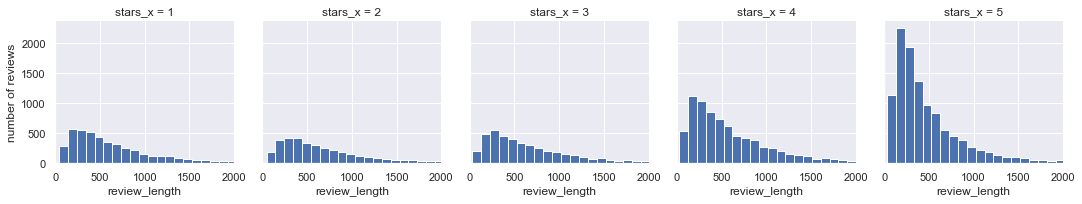

In [76]:
import seaborn as sns
sns.set()
data['review_length'] = data.text.map(len)
ax = sns.FacetGrid(data=data, col='stars_x',xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews');

### 3. Choose the topics

In [84]:
import numpy as np
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re, string
import sys
import time
import collections

In [92]:
import collections
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhonglingliao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
badreviews = data[(data.stars_x <= 2 )]
goodreviews = data[(data.stars_x >= 4)]
badreviews = badreviews.text
goodreviews = goodreviews.text

#### clean the reviews

In [81]:
badreviews = ["".join([char for char in a if char not in string.punctuation]) for a in badreviews]
goodreviews = ["".join([char for char in a if char not in string.punctuation]) for a in goodreviews]

In [94]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhonglingliao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhonglingliao/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [95]:
text1=badreviews
text1 = [a.lower() for a in text1]
words1 = [nltk.word_tokenize(a) for a in text1]
filtered_words1 = [[word for word in a if word not in stop_words] for a in words1]
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
lemmatized_words1 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words1]

In [96]:
text2=goodreviews
text2 = [a.lower() for a in text2]
words2 = [nltk.word_tokenize(a) for a in text2]
filtered_words2 = [[word for word in a if word not in stop_words] for a in words2]
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
lemmatized_words2 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words2]

#### Let's use LSA to determine the number of top topics and topics we plan to do further analysis with

In [ ]:
from sklearn.feature_extraction.text import TfidVectorizer
